In [5]:
!pip install missingno

In [9]:
# Import Numpy, Pandas, Matplotlib, Seaborn, and Missingno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import missingno as msno
import seaborn as sns

In [26]:
#load filepath

filepath = "https://bit.ly/piopetro-data1"
df = pd.read_csv(filepath)

df.head()

DATEPRD NPD_WELL_BORE_NAME  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0  07-Apr-14         15/9-F-1 C            0.0                  0.000   
1  08-Apr-14         15/9-F-1 C            0.0                    NaN   
2  09-Apr-14         15/9-F-1 C            0.0                    NaN   
3  10-Apr-14         15/9-F-1 C            0.0                    NaN   
4  11-Apr-14         15/9-F-1 C            0.0                310.376   

   AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                     0.000          0.000                0.0   
1                       NaN            NaN                0.0   
2                       NaN            NaN                0.0   
3                       NaN            NaN                0.0   
4                    96.876        277.278                0.0   

   AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0           0.00000      0.000       0.00          0.000           0.0   
1           1.00306      0.000       0.00          0.000           0.0   
2           0.97901      0.000       0.00          0.000           0.0   
3           0.54576      0.000       0.00          0.000           0.0   
4           1.21599     33.098      10.48         33.072           0.0   

   BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND  
0           0.0           0.0          NaN  production  
1           0.0           0.0          NaN  production  
2           0.0           0.0          NaN  production  
3           0.0           0.0          NaN  production  
4           0.0           0.0          NaN  production

In [7]:
# Convert datetime column to Pandas datetime format (%d-%b-%y)
df["DATEPRD"] = pd.to_datetime(df["DATEPRD"], format="%d-%b-%y")

df.head()
df

DATEPRD Wellbore name  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0     2014-04-07    15/9-F-1 C                7405         15/9-F-1 C   
1     2014-04-08    15/9-F-1 C                7405         15/9-F-1 C   
2     2014-04-09    15/9-F-1 C                7405         15/9-F-1 C   
3     2014-04-10    15/9-F-1 C                7405         15/9-F-1 C   
4     2014-04-11    15/9-F-1 C                7405         15/9-F-1 C   
...          ...           ...                 ...                ...   
15629 2016-09-14   15/9-F-5 AH                5769           15/9-F-5   
15630 2016-09-15   15/9-F-5 AH                5769           15/9-F-5   
15631 2016-09-16   15/9-F-5 AH                5769           15/9-F-5   
15632 2016-09-17   15/9-F-5 AH                5769           15/9-F-5   
15633 2016-09-18   15/9-F-5 AH                5769           15/9-F-5   

       NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0             3420717          VOLVE             369304    MÆRSK INSPIRER   
1             3420717          VOLVE             369304    MÆRSK INSPIRER   
2             3420717          VOLVE             369304    MÆRSK INSPIRER   
3             3420717          VOLVE             369304    MÆRSK INSPIRER   
4             3420717          VOLVE             369304    MÆRSK INSPIRER   
...               ...            ...                ...               ...   
15629         3420717          VOLVE             369304    MÆRSK INSPIRER   
15630         3420717          VOLVE             369304    MÆRSK INSPIRER   
15631         3420717          VOLVE             369304    MÆRSK INSPIRER   
15632         3420717          VOLVE             369304    MÆRSK INSPIRER   
15633         3420717          VOLVE             369304    MÆRSK INSPIRER   

       ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0                0.0                    0.0  ...              0        0.0   
1                0.0                    0.0  ...              0        0.0   
2                0.0                    0.0  ...              0        0.0   
3                0.0                    0.0  ...              0        0.0   
4                0.0                310.376  ...              0     33.098   
...              ...                    ...  ...            ...        ...   
15629            0.0                    0.0  ...              0      0.078   
15630            0.0                    0.0  ...              0      0.085   
15631            0.0                    0.0  ...              0      0.085   
15632            0.0                    0.0  ...              0      0.075   
15633            0.0                    0.0  ...              0        0.0   

       AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0            0.0            0.0             0             0             0   
1            0.0            0.0             0             0             0   
2            0.0            0.0             0             0             0   
3            0.0            0.0             0             0             0   
4          10.48         33.072             0             0             0   
...          ...            ...           ...           ...           ...   
15629      0.229          0.019             0             0             0   
15630      0.229          0.006             0             0             0   
15631      0.229          0.012             0             0             0   
15632      0.228          0.026             0             0             0   
15633        0.0            0.0             0             0             0   

       BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0                0  production         WI  
1                0  production         OP  
2                0  production         OP  
3                0  production         OP  
4                0  production         OP  
...            ...         ...        ...  
15629            0  production       

In [10]:
# Print all column names / features
df.columns

Index(['DATEPRD', 'Wellbore name', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [29]:
# Print all well names (unique)
df["NPD_WELL_BORE_NAME"].unique()

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D',
       '15/9-F-4', '15/9-F-5'], dtype=object)

In [30]:
# Separate well 15/9-F-14 from dataframe
mask = df["NPD_WELL_BORE_NAME"] == "15/9-F-14"

well14_df = df[mask].reset_index()

well14_df.head()

index    DATEPRD NPD_WELL_BORE_NAME  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0   4967 2008-02-12          15/9-F-14            0.0                    0.0   
1   4968 2008-02-13          15/9-F-14            0.0                    0.0   
2   4969 2008-02-14          15/9-F-14            0.0                    0.0   
3   4970 2008-02-15          15/9-F-14            0.0                    0.0   
4   4971 2008-02-16          15/9-F-14            0.0                    0.0   

   AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                       0.0            0.0                0.0   
1                       0.0            0.0                0.0   
2                       0.0            0.0                0.0   
3                       0.0            0.0                0.0   
4                       0.0            0.0                0.0   

   AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0               NaN        0.0        0.0          0.059           0.0   
1               NaN        0.0        0.0          0.068           0.0   
2               NaN        0.0        0.0          0.050           0.0   
3               NaN        0.0        0.0          0.066           0.0   
4               NaN        0.0        0.0          0.105           0.0   

   BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND  
0           0.0           0.0          NaN  production  
1           0.0           0.0          NaN  production  
2           0.0           0.0          NaN  production  
3           0.0           0.0          NaN  production  
4           0.0           0.0          NaN  production

In [31]:
# Display summary statistics of data
well14_df.describe()

index                        DATEPRD  ON_STREAM_HRS  \
count  3056.000000                           3056    3056.000000   
mean   6494.500000  2012-06-04 14:32:40.209423872      20.541194   
min    4967.000000            2008-02-12 00:00:00       0.000000   
25%    5730.750000            2010-03-24 18:00:00      24.000000   
50%    6494.500000            2012-06-10 12:00:00      24.000000   
75%    7258.250000            2014-08-15 06:00:00      24.000000   
max    8022.000000            2016-09-17 00:00:00      25.000000   
std     882.335537                            NaN       7.881136   

       AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
count            3050.000000               3050.000000    3050.000000   
mean              233.074651                 95.133791     192.653088   
min                 0.000000                  0.000000       0.000000   
25%               237.493000                 99.621000     180.749500   
50%               246.776000                101.007500     204.247500   
75%               261.971250                105.049000     229.632750   
max               334.656000                106.773000     302.110000   
std                64.923765                 25.846814      57.736987   

       AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  \
count        2533.000000       2860.000000  3056.000000  3056.000000   
mean           10.527985         69.390287    41.530601    77.103033   
min             0.000000          0.000000     0.000000     0.000000   
25%             0.000000         43.014158    31.020500    81.223500   
50%            12.969000         71.012955    33.546000    86.963500   
75%            21.232000        100.000000    49.080250    88.539000   
max            26.682000        100.000000   125.719000    93.510000   
std             9.704603         31.064576    22.719575    25.615707   

       DP_CHOKE_SIZE  BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
count    3056.000000   3056.000000    3056.000000   3056.000000          0.0  
mean       15.435755   1290.009817  189139.247382   2330.245746          NaN  
min         0.000000      0.000000       0.000000    -59.000000          NaN  
25%         2.665500    210.000000   31303.750000    695.500000          NaN  
50%         7.177500    881.000000  142363.000000   2965.500000          NaN  
75%        21.174000   2033.500000  305328.000000   3444.250000          NaN  
max       125.719000   5644.000000  789975.000000   5692.000000          NaN  
std        19.965158   1298.363790  184204.112292   1462.922870          NaN

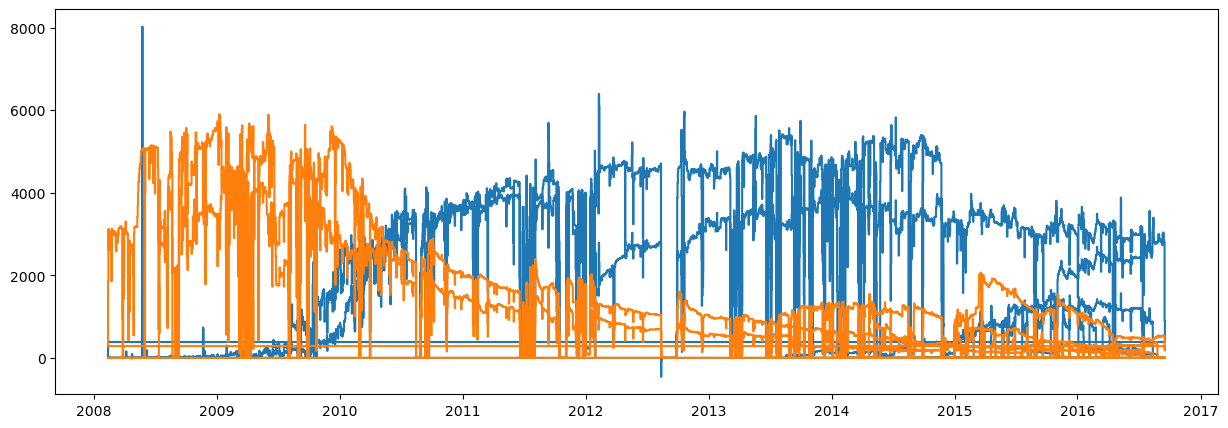

In [32]:
# Plot water and oil production (use step)
plt.figure(figsize=(15,5))

plt.step(df["DATEPRD"], df["BORE_WAT_VOL"])
plt.step(df["DATEPRD"], df["BORE_OIL_VOL"])

plt.show()

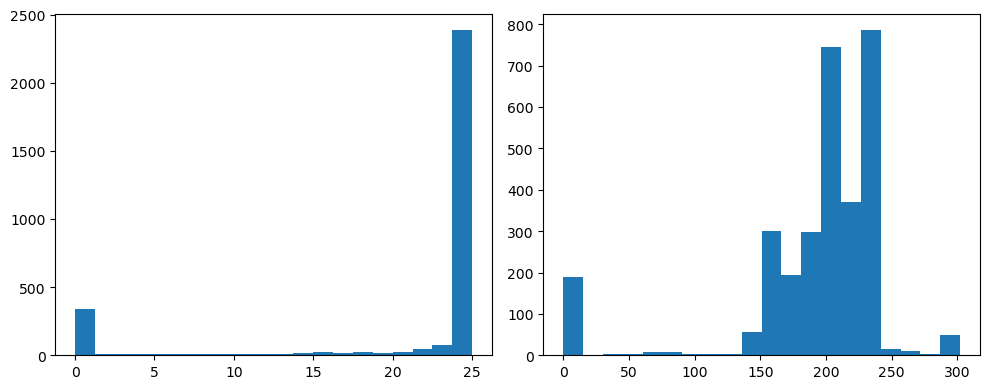

In [34]:
# Produce histogram of data (use subplots!)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(well14_df["ON_STREAM_HRS"], bins=20)

plt.subplot(1,2,2)
plt.hist(well14_df["AVG_DP_TUBING"], bins=20)

plt.tight_layout()
plt.show()

C:\Users\lanci\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


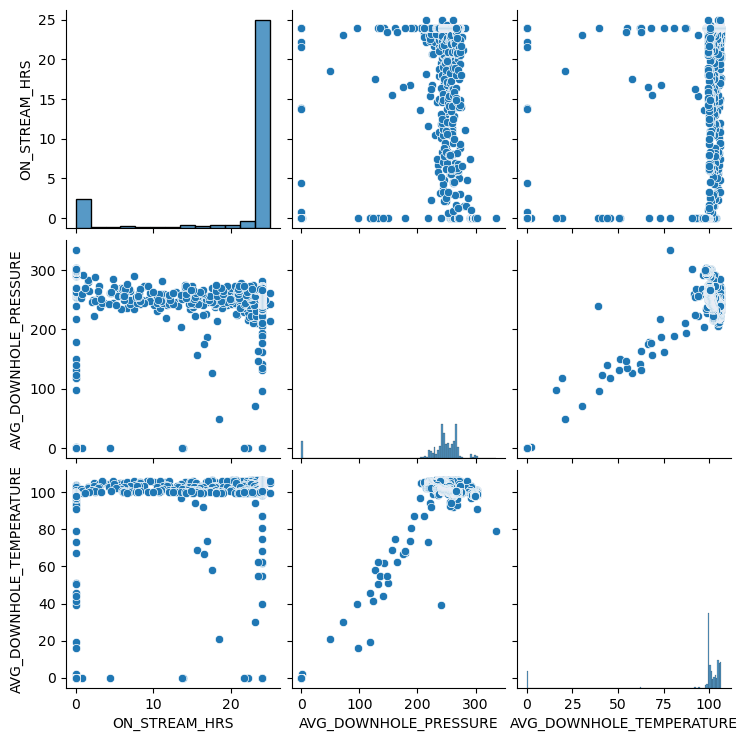

In [35]:
# Make pairplot between features using Seaborn
sns.pairplot(well14_df[["ON_STREAM_HRS", "AVG_DOWNHOLE_PRESSURE", "AVG_DOWNHOLE_TEMPERATURE"]])
plt.show()

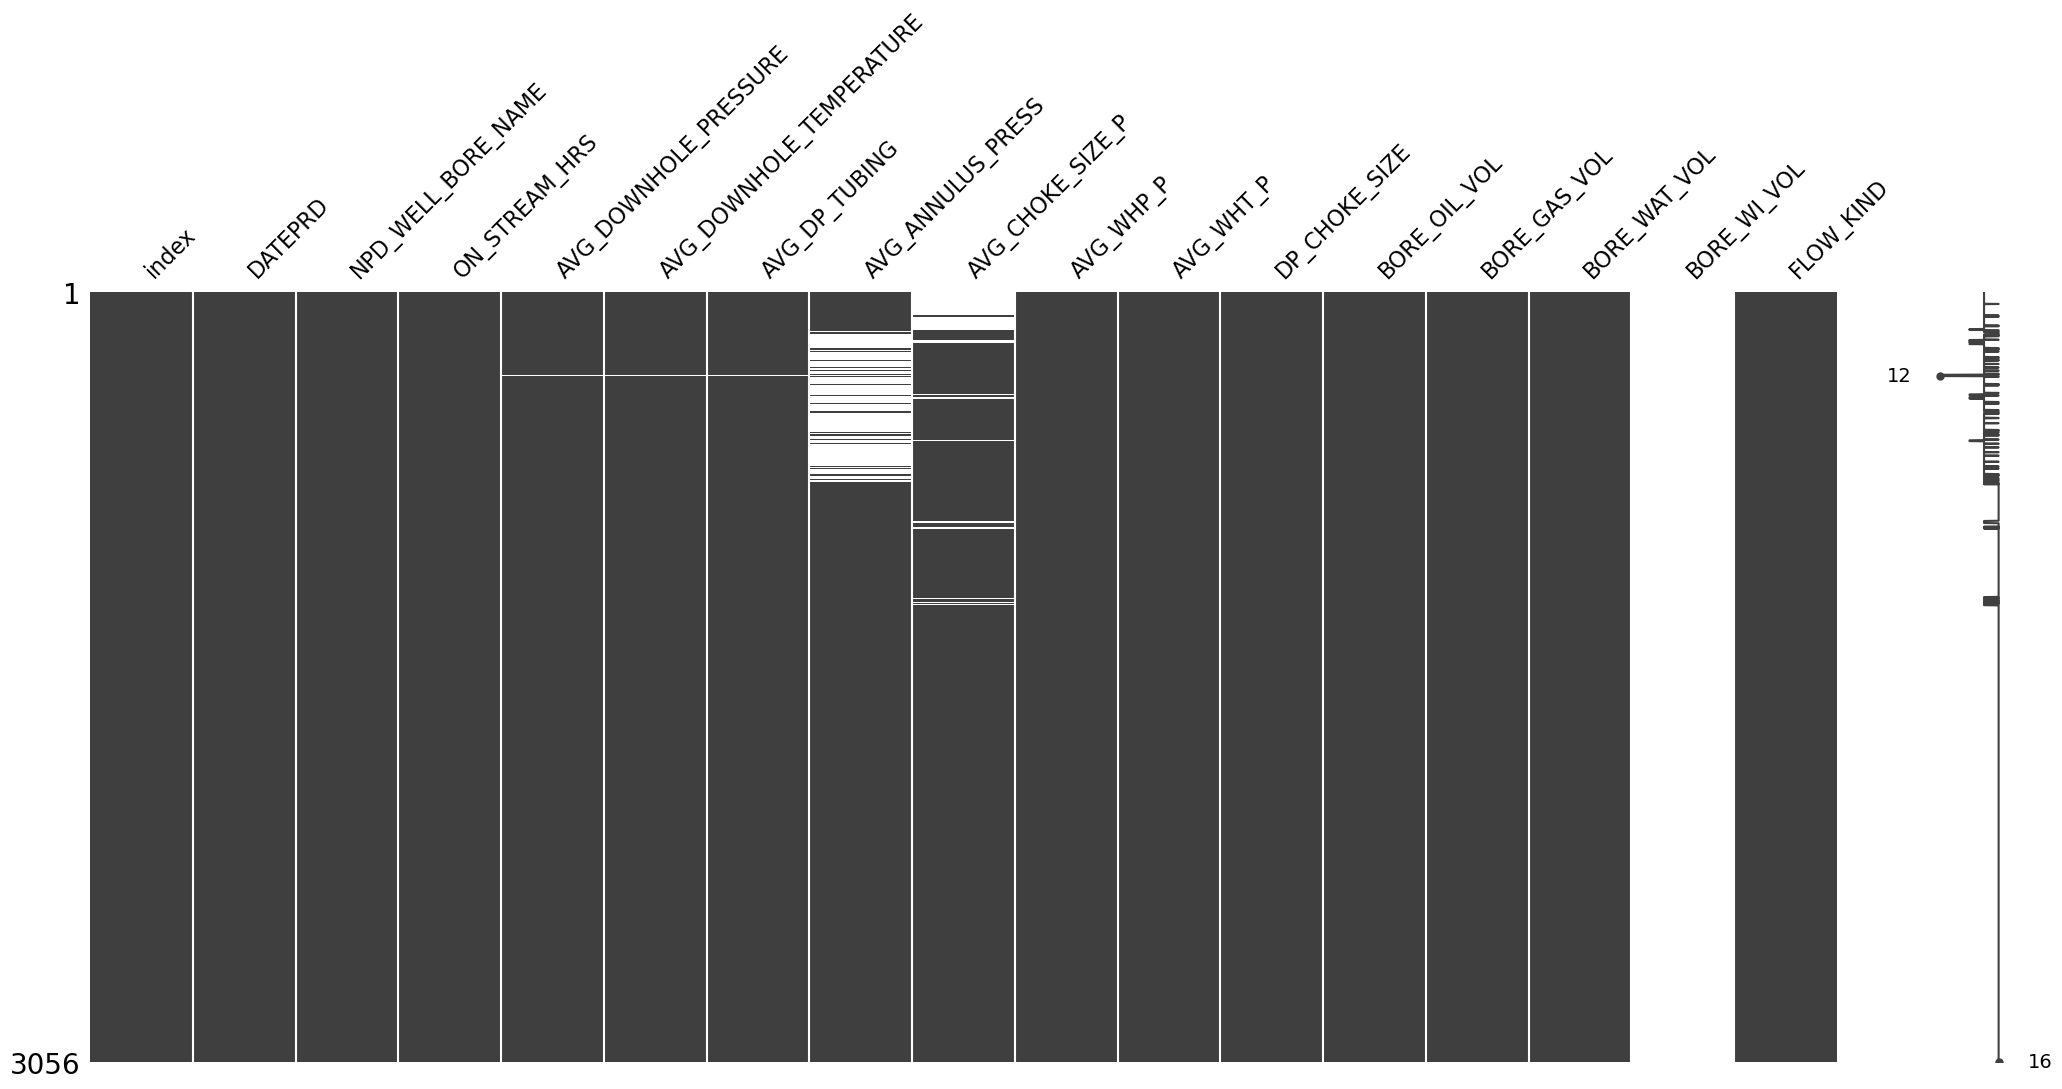

In [36]:
# Visualize missing values (non-numeric) in data using Missingno
msno.matrix(well14_df)
plt.show()

In [38]:
# Interpolation to fill missing values
well14_df = well14_df.interpolate(method="linear", axis=0)

well14_df.head()

index    DATEPRD NPD_WELL_BORE_NAME  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0   4967 2008-02-12          15/9-F-14            0.0                    0.0   
1   4968 2008-02-13          15/9-F-14            0.0                    0.0   
2   4969 2008-02-14          15/9-F-14            0.0                    0.0   
3   4970 2008-02-15          15/9-F-14            0.0                    0.0   
4   4971 2008-02-16          15/9-F-14            0.0                    0.0   

   AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                       0.0            0.0                0.0   
1                       0.0            0.0                0.0   
2                       0.0            0.0                0.0   
3                       0.0            0.0                0.0   
4                       0.0            0.0                0.0   

   AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0               NaN        0.0        0.0          0.059           0.0   
1               NaN        0.0        0.0          0.068           0.0   
2               NaN        0.0        0.0          0.050           0.0   
3               NaN        0.0        0.0          0.066           0.0   
4               NaN        0.0        0.0          0.105           0.0   

   BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND  
0           0.0           0.0          NaN  production  
1           0.0           0.0          NaN  production  
2           0.0           0.0          NaN  production  
3           0.0           0.0          NaN  production  
4           0.0           0.0          NaN  production

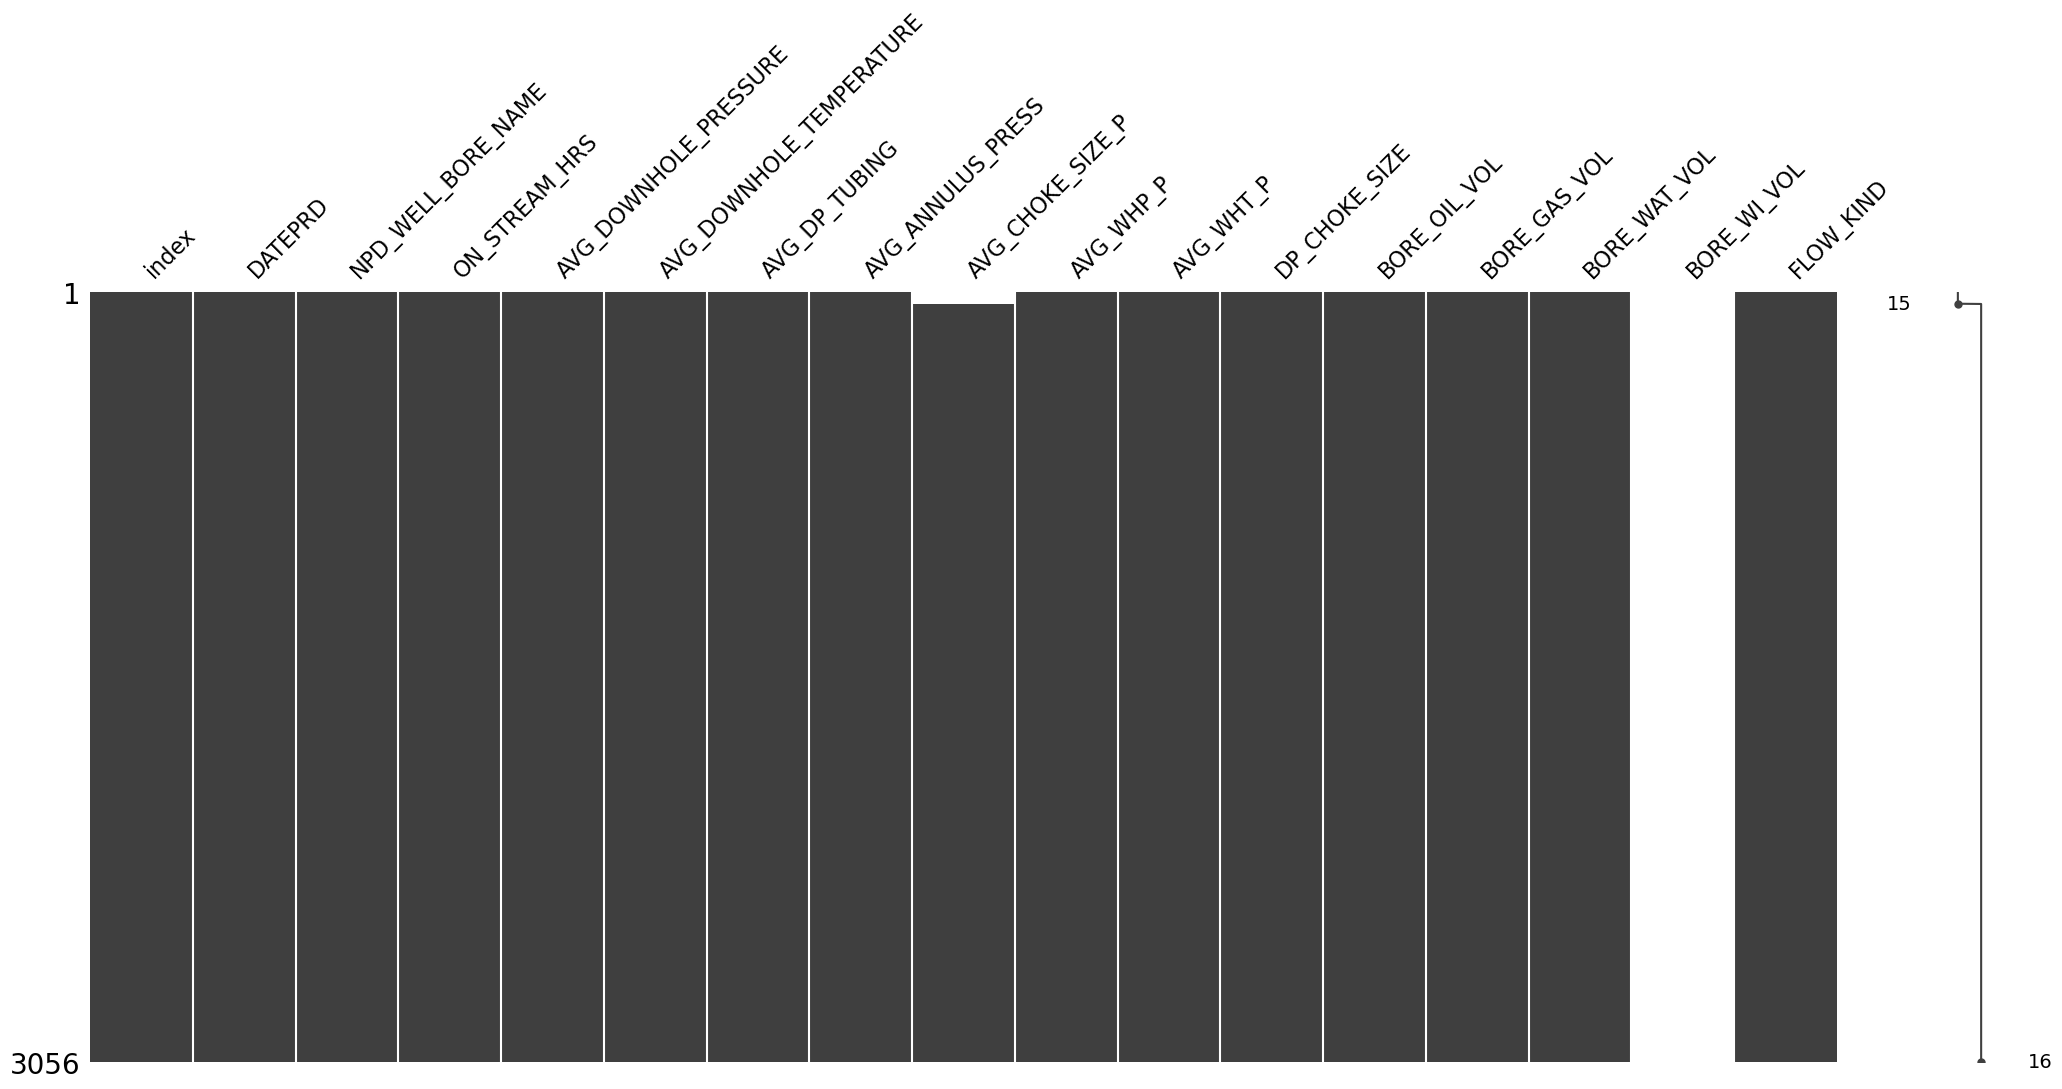

In [39]:
# Visualize Missigno after missing values filled w/ interpolated data
msno.matrix(well14_df)
plt.show()

### Volve

In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r"C:\Users\lanci\OneDrive\Desktop\Trainning Dta\case2-volve.txt", sep="\t")
df = df.convert_dtypes()
df.DATEPRD = pd.to_datetime(df.DATEPRD)
df.fillna(0, inplace=True)
df.columns

Index(['DATEPRD', 'Wellbore name', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [2]:
# to get knowing the types of data
df.dtypes
# convert data to possible types
df = df.convert_dtypes()
df.dtypes


DATEPRD                     datetime64[ns]
Wellbore name               string[python]
NPD_WELL_BORE_CODE                   Int64
NPD_WELL_BORE_NAME          string[python]
NPD_FIELD_CODE                       Int64
NPD_FIELD_NAME              string[python]
NPD_FACILITY_CODE                    Int64
NPD_FACILITY_NAME           string[python]
ON_STREAM_HRS                      Float64
AVG_DOWNHOLE_PRESSURE              Float64
AVG_DOWNHOLE_TEMPERATURE           Float64
AVG_DP_TUBING                      Float64
AVG_ANNULUS_PRESS                  Float64
AVG_CHOKE_SIZE_P                   Float64
AVG_CHOKE_UOM                        Int64
AVG_WHP_P                          Float64
AVG_WHT_P                          Float64
DP_CHOKE_SIZE                      Float64
BORE_OIL_VOL                         Int64
BORE_GAS_VOL                         Int64
BORE_WAT_VOL                         Int64
BORE_WI_VOL                          Int64
FLOW_KIND                   string[python]
WELL_TYPE  

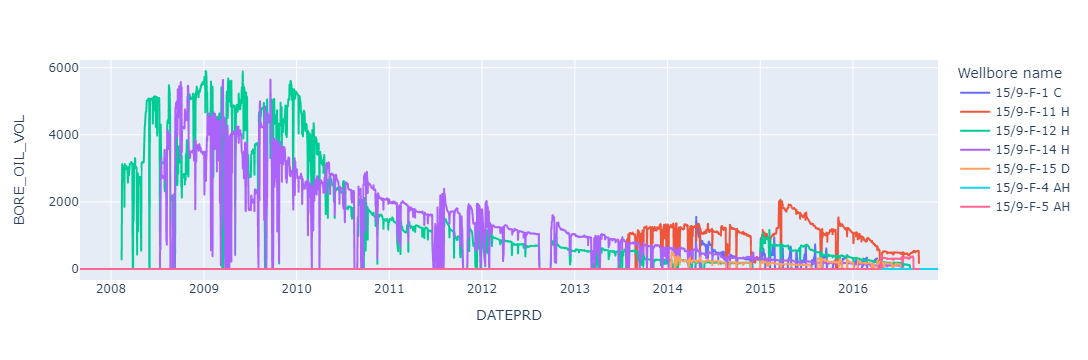

In [3]:
px.line(df, x="DATEPRD", y="BORE_OIL_VOL", color="Wellbore name") # take 3 input

In [4]:
import plotly.graph_objects as go
wells = df["Wellbore name"].unique() # for wells filtering
wells

<StringArray>
[ '15/9-F-1 C', '15/9-F-11 H', '15/9-F-12 H', '15/9-F-14 H', '15/9-F-15 D',
 '15/9-F-4 AH', '15/9-F-5 AH']
Length: 7, dtype: string

In [5]:
df_filt = df[df["Wellbore name"] == "15/9-F-1 C"] # for filtering crieteria
df_filt

DATEPRD Wellbore name  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0   2014-04-07    15/9-F-1 C                7405         15/9-F-1 C   
1   2014-04-08    15/9-F-1 C                7405         15/9-F-1 C   
2   2014-04-09    15/9-F-1 C                7405         15/9-F-1 C   
3   2014-04-10    15/9-F-1 C                7405         15/9-F-1 C   
4   2014-04-11    15/9-F-1 C                7405         15/9-F-1 C   
..         ...           ...                 ...                ...   
741 2016-04-17    15/9-F-1 C                7405         15/9-F-1 C   
742 2016-04-18    15/9-F-1 C                7405         15/9-F-1 C   
743 2016-04-19    15/9-F-1 C                7405         15/9-F-1 C   
744 2016-04-20    15/9-F-1 C                7405         15/9-F-1 C   
745 2016-04-21    15/9-F-1 C                7405         15/9-F-1 C   

     NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0           3420717          VOLVE             369304    MÆRSK INSPIRER   
1           3420717          VOLVE             369304    MÆRSK INSPIRER   
2           3420717          VOLVE             369304    MÆRSK INSPIRER   
3           3420717          VOLVE             369304    MÆRSK INSPIRER   
4           3420717          VOLVE             369304    MÆRSK INSPIRER   
..              ...            ...                ...               ...   
741         3420717          VOLVE             369304    MÆRSK INSPIRER   
742         3420717          VOLVE             369304    MÆRSK INSPIRER   
743         3420717          VOLVE             369304    MÆRSK INSPIRER   
744         3420717          VOLVE             369304    MÆRSK INSPIRER   
745         3420717          VOLVE             369304    MÆRSK INSPIRER   

     ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0              0.0                    0.0  ...              0        0.0   
1              0.0                    0.0  ...              0        0.0   
2              0.0                    0.0  ...              0        0.0   
3              0.0                    0.0  ...              0        0.0   
4              0.0                310.376  ...              0     33.098   
..             ...                    ...  ...            ...        ...   
741            0.0                270.268  ...              0      6.498   
742            0.0                276.869  ...              0     13.714   
743            0.0                282.105  ...              0      8.576   
744            0.0                285.096  ...              0      18.28   
745            0.0                    0.0  ...              0        0.0   

     AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0          0.0            0.0             0             0             0   
1          0.0            0.0             0             0             0   
2          0.0            0.0             0             0             0   
3          0.0            0.0             0             0             0   
4        10.48         33.072             0             0             0   
..         ...            ...           ...           ...           ...   
741      9.802          2.645             0             0             0   
742     11.742           4.12             0             0             0   
743     10.119          1.866             0             0             0   
744      9.872          7.414             0             0             0   
745        0.0            0.0             0             0             0   

     BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0              0  production         WI  
1              0  production         OP  
2              0  production         OP  
3              0  production         OP  
4              0  production         OP  
..           ...         ...        ...  
741            0  production         OP  
742            0  production         OP  
743            0  production         OP  
744            0  p

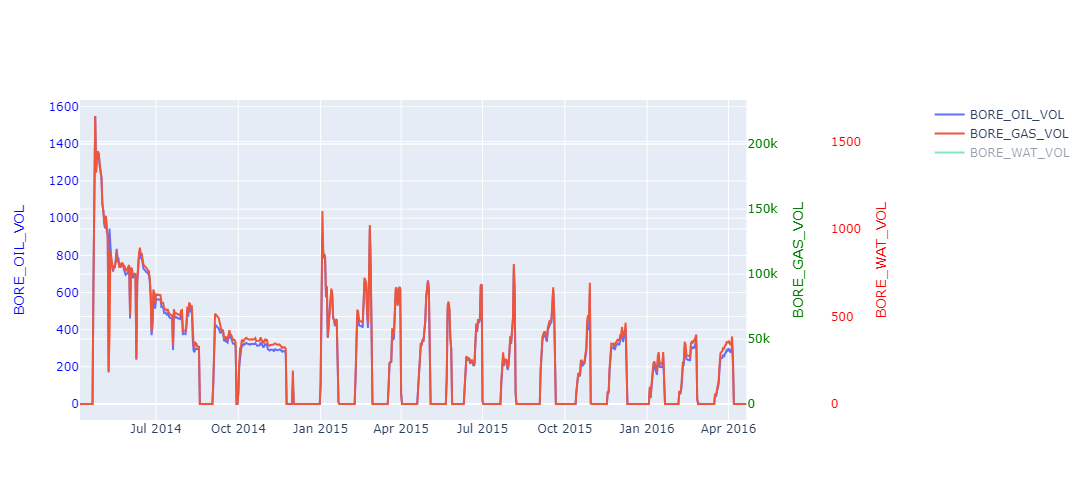

In [6]:
#import plotly.graph_objects as go
wells = df["Wellbore name"].unique() # for wells filtering
df_filt = df[df["Wellbore name"] == "15/9-F-1 C"] # for filtering crieteria
list_var = ['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL'] #list of variable
ys       = ["y"        , "y2"           , "y3"          , "y4"] #list of Y axies 
figure = go.Figure()
# iterate to creat interactive plot
for i in range(0,3):
    y_name = list_var[i]
    plot = go.Scatter(x = df_filt["DATEPRD"], y= df_filt[y_name], name = y_name, yaxis = ys[i])
    figure.add_trace(plot)
figure.update_layout(yaxis = {"title":"BORE_OIL_VOL", "color": "blue"})
figure.update_layout(yaxis2={"side":"right","overlaying":"y","title":"BORE_GAS_VOL","color":"green"})
figure.update_layout(yaxis3={"side":"right","overlaying":"y","title":"BORE_WAT_VOL","color":"red","position": 0.9}) 
#manipulate the domain of x axis
figure.update_xaxes(domain=[0,0.8])
figure.update_layout(width = 1100, height = 500 )

In [11]:
!pip install lasio

In [3]:
import lasio as ls
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib qt

### MFT is tool used lower in the well to measure different parameter(thickness) at different depth in the tubing
**it help the operator to know if they have Corrosion  or unwanted deposition in the tubing**, in this file we gonna focus on data labaled FING
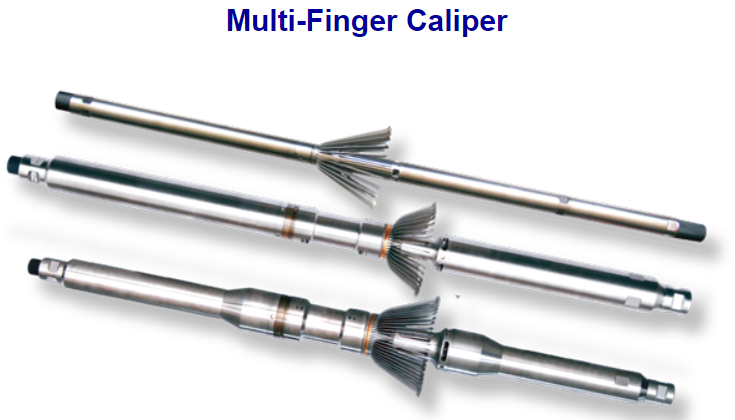

In [4]:
#first step is to read the las file
las = ls.read(r"C:\Users\lanci\OneDrive\Desktop\Trainning Dta\case7 - MIT.LAS")# multifinger caliper log (MFC)

In [5]:
df = las.df() # lasio is built on top of pandas
df

LSPD     LTEN  MINMK  MTTR01  MTTR02  MTTR03  MTTR04  MTTR05  \
DEPT                                                                       
3100.000 -5.2121  40.5217    0.0  -813.0  -768.0  -654.0  -718.0  -754.0   
3100.002 -5.2121  40.5217    0.0  -813.0  -768.0  -654.0  -718.0  -754.0   
3100.004 -5.2121  40.5217    0.0  -812.0  -769.0  -652.0  -720.0  -755.0   
3100.006 -5.2121  40.5217    0.0  -812.0  -769.0  -652.0  -720.0  -755.0   
3100.008 -5.2121  40.5217    0.0  -812.0  -769.0  -652.0  -720.0  -755.0   
...          ...      ...    ...     ...     ...     ...     ...     ...   
3204.992 -1.8075  40.5217    0.0     NaN     NaN     NaN     NaN     NaN   
3204.994 -1.8075  40.5217    0.0     NaN     NaN     NaN     NaN     NaN   
3204.996 -1.8075  40.5217    0.0     NaN     NaN     NaN     NaN     NaN   
3204.998 -1.8075  40.5217    0.0     NaN     NaN     NaN     NaN     NaN   
3205.000 -1.8075  40.5217    0.0     NaN     NaN     NaN     NaN     NaN   

          MTTR06  MTTR07  ...  DIAM11  DIAM12  AVEDIA  MINDIA  MAXDIA  AVERAD  \
DEPT                      ...                                                   
3100.000  -843.0  -902.0  ...  2.4394  2.4601  2.4389  2.4095  2.4602  1.2195   
3100.002  -843.0  -902.0  ...  2.4394  2.4601  2.4389  2.4095  2.4602  1.2195   
3100.004  -847.0  -907.0  ...  2.4431  2.4642  2.4360  2.3917  2.4642  1.2180   
3100.006  -847.0  -907.0  ...  2.4431  2.4642  2.4360  2.3917  2.4642  1.2180   
3100.008  -847.0  -907.0  ...  2.4712  2.4682  2.4399  2.3937  2.4712  1.2200   
...          ...     ...  ...     ...     ...     ...     ...     ...     ...   
3204.992     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3204.994     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3204.996     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3204.998     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3205.000     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

          MINRAD  MAXRAD       GR  CASETHCK  
DEPT                                         
3100.000  1.1796  1.2571  12.6668       0.0  
3100.002  1.1796  1.2571  12.6668       0.0  
3100.004  1.1759  1.2557  12.6668       0.0  
3100.006  1.1759  1.2557  12.6668       0.0  
3100.008  1.1759  1.2648  12.6668       0.0  
...          ...     ...      ...       ...  
3204.992     NaN     NaN      NaN       0.0  
3204.994     NaN     NaN      NaN       0.0  
3204.996     NaN     NaN      NaN       0.0  
3204.998     NaN     NaN      NaN       0.0  
3205.000     NaN     NaN      NaN       0.0  

[52501 rows x 105 columns]

In [6]:
#to read the title of the different columns that i have 
df.columns

Index(['LSPD', 'LTEN', 'MINMK', 'MTTR01', 'MTTR02', 'MTTR03', 'MTTR04',
       'MTTR05', 'MTTR06', 'MTTR07',
       ...
       'DIAM11', 'DIAM12', 'AVEDIA', 'MINDIA', 'MAXDIA', 'AVERAD', 'MINRAD',
       'MAXRAD', 'GR', 'CASETHCK'],
      dtype='object', length=105)

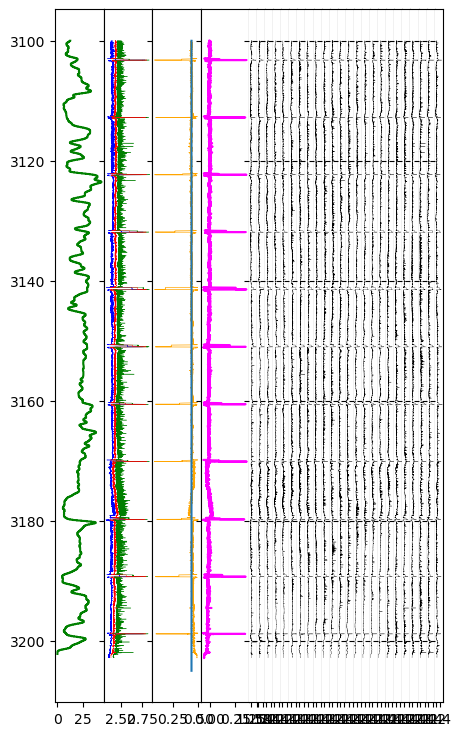

In [8]:
#loop through all columns
fingers = []
for c in df.columns:
    if c.startswith("FING"):
        fingers.append(c)
        
#we gonna be plotting different parameter ( Gamma Ray,[min,max,av.],calculation column,FING column[containing 24 colomns])
grid_size = [30,30,30,30]+[5]*24
fig, ax = plt.subplots (1,28, sharey = True, gridspec_kw = {'width_ratios':grid_size},figsize =(5,9)) #the sharey is set as True to allow the plot to sink up otherwise it will look horrible
fig.subplots_adjust(wspace = 0)

#Adding gamma ray
ax[0].plot(df.GR,df.index, label= "GR",color= "green")
ax[0].invert_yaxis() #to revert the the depth value lower-higher

#Adding aggredeted curve(min,max, ....)
ax[1].plot(df.MINDIA,df.index, label= "MinDia",color= "blue", lw=0.3)
ax[1].plot(df.MAXDIA,df.index, label= "MaxDia",color= "green", lw=0.3)
ax[1].plot(df.AVEDIA,df.index, label= "AvrDia",color= "red", lw=0.3)


#Creat a calculation #but first let view the inner diameter of the tubing in other to know if u won or lost some thichness
inner_diameter = 2.441 
outter_diameter = 2.875
manufac_thickness = outter_diameter - inner_diameter #inches
manufac_thickness 
df["new_thichness"] = outter_diameter - df.AVEDIA 
df["manufac_thickness"] = manufac_thickness
ax[2].plot(df["new_thichness"],df.index, label= "Remaining thickness",color= "orange", lw=0.5)
ax[2].plot(df["manufac_thickness"],df.index, label= "Manufacture thickness")

#Calculate the lost of metal (strenght)
df["lost_metal (in)"] = df["manufac_thickness"]-df["new_thichness"]
df["%lost"] = (df["lost_metal (in)"]/df["manufac_thickness"])*100   #lost of strenght in porcentage
ax[3].plot(df["lost_metal (in)"],df.index, color= "magenta")


#plot the fingers(24)
for i in range(0,24):
    ax[i + 4].plot(df[fingers[i]],df.index , color = "black", lw=0.2)
    ax[i + 4].spines.right.set_visible(True)
    ax[i + 4].spines.left.set_visible(False)
    
    